### Loading Libraries and Dataset

In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_data_validation as tfdv
from tensorflow_data_validation.statistics import stats_options as options
import warnings
warnings.filterwarnings('ignore')

In [5]:
dataset_jan = pd.read_parquet(r'C:\Users\HP\Desktop\Intro to DL\yellow_tripdata_2020_01.parquet', engine = 'fastparquet')
dataset_mar = pd.read_parquet(r'C:\Users\HP\Desktop\Intro to DL\yellow_tripdata_2020_03.parquet', engine = 'fastparquet')
dataset_may = pd.read_parquet(r'C:\Users\HP\Desktop\Intro to DL\yellow_tripdata_2020_05.parquet', engine = 'fastparquet')
dataset_mar.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2020-03-01 00:31:13,2020-03-01 01:01:42,1.0,4.70,1.0,N,88,255,1,22.0,3.0,0.5,2.00,0.0,0.3,27.80,2.5,<NA>
1,2,2020-03-01 00:08:22,2020-03-01 00:08:49,1.0,0.00,1.0,N,193,193,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80,0.0,<NA>
2,1,2020-03-01 00:52:18,2020-03-01 00:59:16,1.0,1.10,1.0,N,246,90,1,6.0,3.0,0.5,1.95,0.0,0.3,11.75,2.5,<NA>
3,2,2020-03-01 00:47:53,2020-03-01 00:50:57,2.0,0.87,1.0,N,151,238,1,5.0,0.5,0.5,1.76,0.0,0.3,10.56,2.5,<NA>
4,1,2020-03-01 00:43:19,2020-03-01 00:58:27,0.0,4.40,1.0,N,79,261,1,16.5,3.0,0.5,4.05,0.0,0.3,24.35,2.5,<NA>


### Data Pre- Processing

In [3]:
datam=dataset_mar.drop(['airport_fee'], axis=1)

In [4]:
datam.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          37808
trip_distance                0
RatecodeID               37808
store_and_fwd_flag       37808
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     37808
dtype: int64

In [5]:
datam['passenger_count']=datam['passenger_count'].fillna(datam['passenger_count'].mean())

In [6]:
datam['RatecodeID']=datam['RatecodeID'].fillna(datam['RatecodeID'].mean())

In [7]:
datam['congestion_surcharge']=datam['congestion_surcharge'].fillna(datam['congestion_surcharge'].mean())

In [8]:
datam.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID                   0
store_and_fwd_flag       37808
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
dtype: int64

In [9]:
datam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3007687 entries, 0 to 3007686
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
dtypes: datetime64[ns](2), 

In [10]:
datam.shape

(3007687, 18)

In [11]:
datam=datam.replace({'N':0,'Y':1})

In [12]:
datam.store_and_fwd_flag.value_counts()

0.0    2941898
1.0      27981
Name: store_and_fwd_flag, dtype: int64

### Feature engineering

In [22]:
datam['tpep_pickup_datetime']=pd.to_datetime(datam['tpep_pickup_datetime'])
datam['tpep_dropoff_datetime']=pd.to_datetime(datam['tpep_dropoff_datetime'])
datam['pickup_day']=datam['tpep_pickup_datetime'].dt.day_name()
datam['dropoff_day']=datam['tpep_dropoff_datetime'].dt.day_name()
datam['pickup_day_no']=datam['tpep_pickup_datetime'].dt.weekday
datam['dropoff_day_no']=datam['tpep_dropoff_datetime'].dt.weekday
datam['pickup_hour']=datam['tpep_pickup_datetime'].dt.hour
datam['dropoff_hour']=datam['tpep_dropoff_datetime'].dt.hour
datam['pickup_month']=datam['tpep_pickup_datetime'].dt.month
datam['dropoff_month']=datam['tpep_dropoff_datetime'].dt.month

In [23]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [24]:
datam['pickup_timeofday']=datam['pickup_hour'].apply(time_of_day)
datam['dropoff_timeofday']=datam['dropoff_hour'].apply(time_of_day)

In [26]:
datam

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,trip_duration
0,1,2020-03-01 00:31:13,2020-03-01 01:01:42,1.000000,4.70,1.000000,0.0,88,255,1,...,Sunday,6,6,0,1,3,3,Late night,Late night,30.483333
1,2,2020-03-01 00:08:22,2020-03-01 00:08:49,1.000000,0.00,1.000000,0.0,193,193,2,...,Sunday,6,6,0,0,3,3,Late night,Late night,0.450000
2,1,2020-03-01 00:52:18,2020-03-01 00:59:16,1.000000,1.10,1.000000,0.0,246,90,1,...,Sunday,6,6,0,0,3,3,Late night,Late night,6.966667
3,2,2020-03-01 00:47:53,2020-03-01 00:50:57,2.000000,0.87,1.000000,0.0,151,238,1,...,Sunday,6,6,0,0,3,3,Late night,Late night,3.066667
5,1,2020-03-01 00:04:43,2020-03-01 00:23:17,1.000000,3.50,1.000000,1.0,113,142,1,...,Sunday,6,6,0,0,3,3,Late night,Late night,18.566667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3007682,2,2020-03-31 23:21:00,2020-03-31 23:33:00,1.467477,5.43,1.051377,NaN,137,87,0,...,Tuesday,1,1,23,23,3,3,Late night,Late night,12.000000
3007683,2,2020-03-31 23:57:00,2020-04-01 00:26:00,1.467477,13.21,1.051377,NaN,137,71,0,...,Wednesday,1,2,23,0,3,4,Late night,Late night,29.000000
3007684,2,2020-03-31 23:22:01,2020-03-31 23:43:52,1.467477,12.14,1.051377,NaN,137,32,0,...,Tuesday,1,1,23,23,3,3,Late night,Late night,21.850000
3007685,2,2020-03-31 23:18:53,2020-03-31 23:32:21,1.467477,7.01,1.051377,NaN,137,159,0,...,Tuesday,1,1,23,23,3,3,Late night,Late night,13.466667


### Outlier Detection & Treatement

count    3.007687e+06
mean     1.467477e+00
std      1.113025e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.467477e+00
max      9.000000e+00
Name: passenger_count, dtype: float64


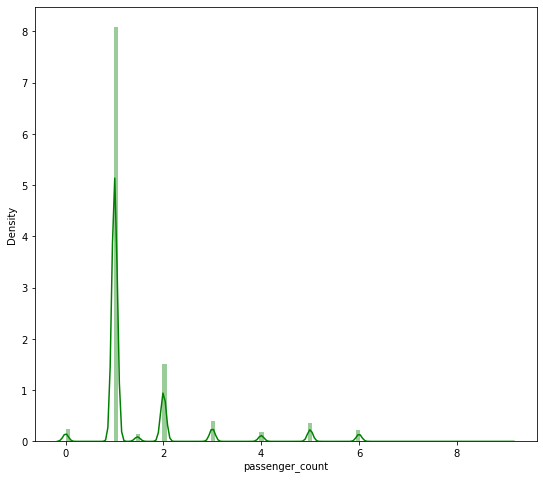

In [13]:
print(datam['passenger_count'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(datam['passenger_count'], color='g', bins=100, hist_kws={'alpha': 0.4});

VendorID                    AxesSubplot(0.125,0.749828;0.133621x0.130172)
passenger_count          AxesSubplot(0.285345,0.749828;0.133621x0.130172)
trip_distance             AxesSubplot(0.44569,0.749828;0.133621x0.130172)
RatecodeID               AxesSubplot(0.606034,0.749828;0.133621x0.130172)
store_and_fwd_flag       AxesSubplot(0.766379,0.749828;0.133621x0.130172)
PULocationID                AxesSubplot(0.125,0.593621;0.133621x0.130172)
DOLocationID             AxesSubplot(0.285345,0.593621;0.133621x0.130172)
payment_type              AxesSubplot(0.44569,0.593621;0.133621x0.130172)
fare_amount              AxesSubplot(0.606034,0.593621;0.133621x0.130172)
extra                    AxesSubplot(0.766379,0.593621;0.133621x0.130172)
mta_tax                     AxesSubplot(0.125,0.437414;0.133621x0.130172)
tip_amount               AxesSubplot(0.285345,0.437414;0.133621x0.130172)
tolls_amount              AxesSubplot(0.44569,0.437414;0.133621x0.130172)
improvement_surcharge    AxesSubplot(0

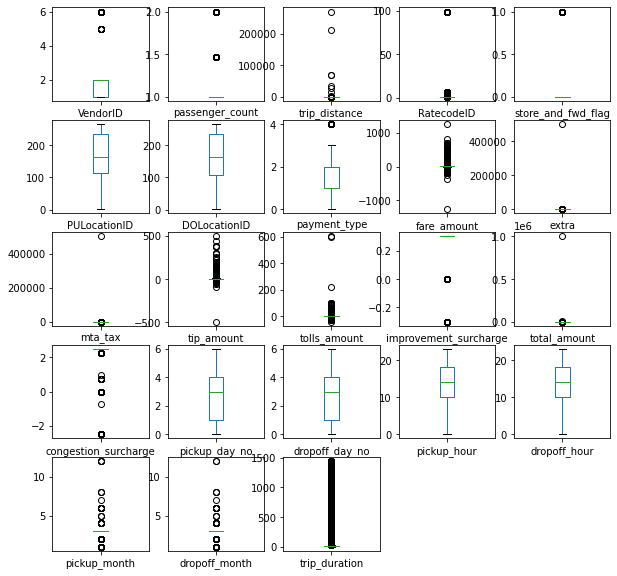

In [39]:
datam.plot(kind="box", subplots=True, layout=(5,5), figsize=(10,10))

In [40]:
outliers_fraction = 0.01

In [41]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn, [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [42]:
lowerbound,upperbound = outlier_treatment(datam.passenger_count)

In [43]:
datam[(datam.passenger_count < lowerbound) | (datam.passenger_count > upperbound)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,trip_duration
3,2,2020-03-01 00:47:53,2020-03-01 00:50:57,2.000000,0.87,1.000000,0.0,151,238,1,...,Sunday,6,6,0,0,3,3,Late night,Late night,3.066667
9,1,2020-03-01 00:25:05,2020-03-01 00:31:06,2.000000,1.30,1.000000,0.0,211,249,1,...,Sunday,6,6,0,0,3,3,Late night,Late night,6.016667
10,1,2020-03-01 00:33:07,2020-03-01 00:43:18,2.000000,1.40,1.000000,0.0,158,211,1,...,Sunday,6,6,0,0,3,3,Late night,Late night,10.183333
11,1,2020-03-01 00:47:02,2020-03-01 00:59:35,2.000000,1.80,1.000000,0.0,211,79,1,...,Sunday,6,6,0,0,3,3,Late night,Late night,12.550000
17,1,2020-03-01 00:01:25,2020-03-01 00:08:01,2.000000,1.00,1.000000,0.0,230,164,1,...,Sunday,6,6,0,0,3,3,Late night,Late night,6.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3007682,2,2020-03-31 23:21:00,2020-03-31 23:33:00,1.467477,5.43,1.051377,NaN,137,87,0,...,Tuesday,1,1,23,23,3,3,Late night,Late night,12.000000
3007683,2,2020-03-31 23:57:00,2020-04-01 00:26:00,1.467477,13.21,1.051377,NaN,137,71,0,...,Wednesday,1,2,23,0,3,4,Late night,Late night,29.000000
3007684,2,2020-03-31 23:22:01,2020-03-31 23:43:52,1.467477,12.14,1.051377,NaN,137,32,0,...,Tuesday,1,1,23,23,3,3,Late night,Late night,21.850000
3007685,2,2020-03-31 23:18:53,2020-03-31 23:32:21,1.467477,7.01,1.051377,NaN,137,159,0,...,Tuesday,1,1,23,23,3,3,Late night,Late night,13.466667


In [44]:
datam.shape

(2632733, 29)

In [45]:
datam.drop(datam[ (datam.passenger_count > upperbound) | (datam.passenger_count < lowerbound) ].index , inplace=True)

passenger_count    AxesSubplot(0.125,0.71587;0.168478x0.16413)
dtype: object

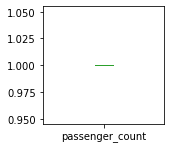

In [46]:
datam.passenger_count.plot(kind="box", subplots=True, layout=(4,4), figsize=(10,10))

In [25]:
datam['trip_duration']=(datam['tpep_dropoff_datetime']-datam['tpep_pickup_datetime']).dt.seconds/60

### Classic EDA

count    2.632733e+06
mean     1.161501e+00
std      3.631023e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      2.000000e+00
Name: passenger_count, dtype: float64


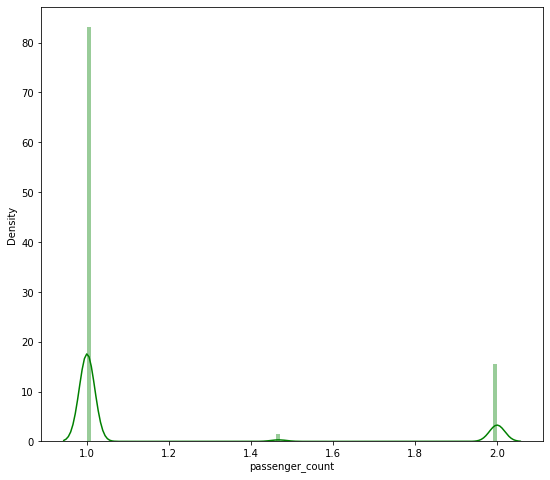

In [27]:
print(datam['passenger_count'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(datam['passenger_count'], color='g', bins=100, hist_kws={'alpha': 0.4});

<AxesSubplot:xlabel='trip_duration', ylabel='Count'>

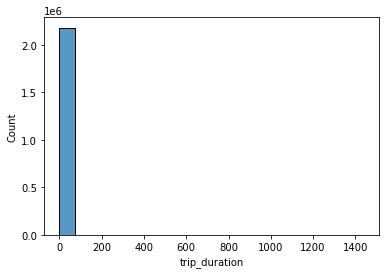

In [47]:
sns.histplot(datam['trip_duration'],kde=False,bins=20)

<AxesSubplot:>

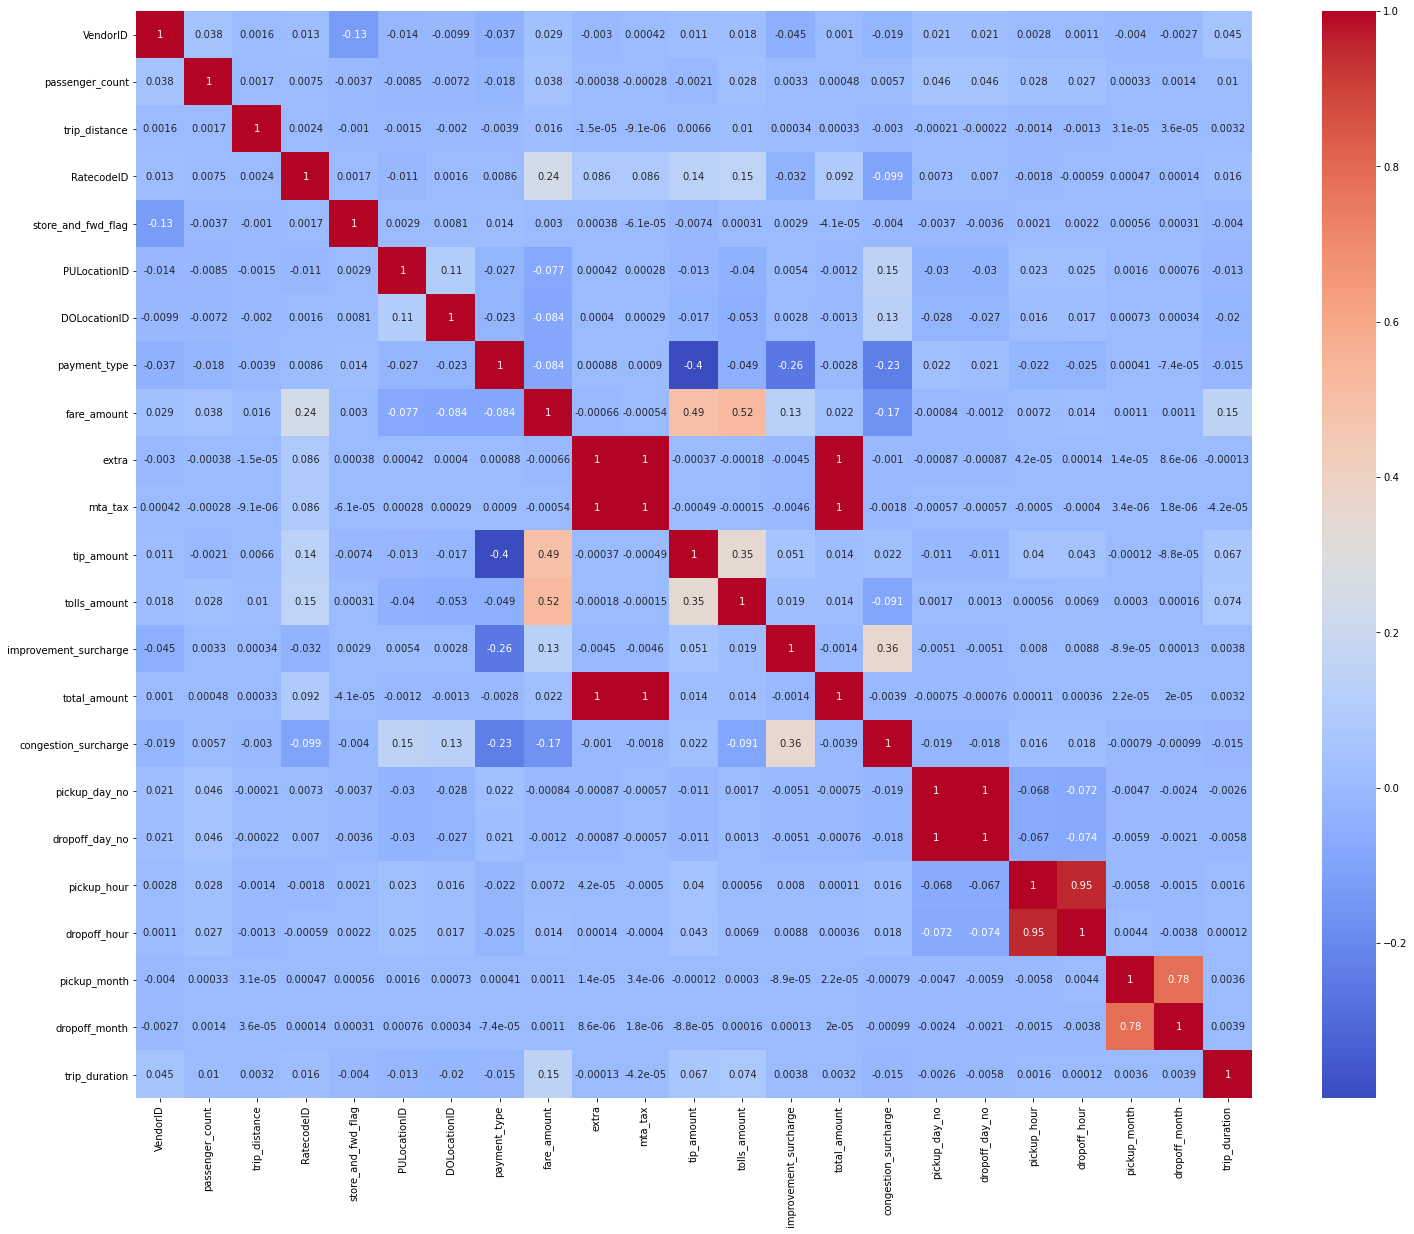

In [29]:
plt.figure(figsize=(25, 20))
corrMatrix = datam.corr()
sns.heatmap(corrMatrix, annot = True, cmap= 'coolwarm')

### Powerful graphical statistics generated EDA

In [30]:
stats = tfdv.generate_statistics_from_dataframe(datam)
tfdv.visualize_statistics(stats)


In [31]:
schema = tfdv.infer_schema(statistics=stats)
tfdv.display_schema(schema=schema)

,Type,Presence,Valency,Domain
Feature name,,,,
'VendorID',INT,required,,-
'passenger_count',FLOAT,required,,-
'trip_distance',FLOAT,required,,-
'RatecodeID',FLOAT,required,,-
'store_and_fwd_flag',FLOAT,optional,single,-
'PULocationID',INT,required,,-
'DOLocationID',INT,required,,-
'payment_type',INT,required,,-
'fare_amount',FLOAT,required,,-


,Values
Domain,
'pickup_day',"'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'"
'dropoff_day',"'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'"
'pickup_timeofday',"'Afternoon', 'Evening', 'Late night', 'Morning'"
'dropoff_timeofday',"'Afternoon', 'Evening', 'Late night', 'Morning'"


In [32]:
anomalies = tfdv.validate_statistics(statistics=stats, schema=schema)
tfdv.display_anomalies(anomalies)

### March vs January & May 2020

In [33]:
jan = tfdv.generate_statistics_from_dataframe(dataset_jan,stats_options=options.StatsOptions())
type(jan)

tensorflow_metadata.proto.v0.statistics_pb2.DatasetFeatureStatisticsList

In [34]:
mar = tfdv.generate_statistics_from_dataframe(dataset_mar,stats_options=options.StatsOptions())
type(mar)

tensorflow_metadata.proto.v0.statistics_pb2.DatasetFeatureStatisticsList

In [35]:
tfdv.visualize_statistics(lhs_statistics=mar, rhs_statistics=jan, lhs_name='TRAIN', rhs_name='TEST')

In [36]:
dataset_may.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2020-05-01 00:02:28,2020-05-01 00:18:07,1.0,0.0,1.0,N,234,256,1,12.2,3.0,0.5,2.4,0.0,0.3,18.4,2.5,<NA>
1,1,2020-05-01 00:23:21,2020-05-01 00:26:01,2.0,0.4,1.0,N,264,264,1,4.0,0.5,0.5,0.5,0.0,0.3,5.8,0.0,<NA>
2,1,2020-05-01 00:54:58,2020-05-01 00:57:11,1.0,0.3,1.0,N,264,264,2,3.5,0.5,0.5,0.0,0.0,0.3,4.8,0.0,<NA>
3,1,2020-05-01 00:07:10,2020-05-01 00:12:46,1.0,1.7,1.0,N,107,229,2,7.0,3.0,0.5,0.0,0.0,0.3,10.8,2.5,<NA>
4,1,2020-05-01 00:55:47,2020-05-01 01:01:54,0.0,0.9,1.0,N,237,262,1,6.0,3.0,0.5,1.2,0.0,0.3,11.0,2.5,<NA>


In [37]:
may = tfdv.generate_statistics_from_dataframe(dataset_may,stats_options=options.StatsOptions())
type(may)

tensorflow_metadata.proto.v0.statistics_pb2.DatasetFeatureStatisticsList

In [38]:
tfdv.visualize_statistics(lhs_statistics=mar, rhs_statistics=may, lhs_name='TRAIN', rhs_name='TEST')

In [6]:
from pandas_profiling import ProfileReport
profile = ProfileReport(dataset_mar, minimal=True)
profile.to_file(output_file="trip.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]